In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [53]:
url ='https://raw.githubusercontent.com/vkoul/data/main/misc/hotel_bookings.csv'

In [54]:
df = pd.read_csv(url)

In [55]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,3,0,0,3,Not Selected,0,Room_Type 1,277,2019,7,13,Online,0,0,0,89.10,2,Canceled


In [56]:
df = pd.read_csv(url,parse_dates={'arrival_complete_date':['arrival_year','arrival_month','arrival_date']})

In [57]:
df

,arrival_complete_date,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2017 10 2,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,65.00,0,Not_Canceled
1,2018 11 6,2,0,2,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,Not_Canceled
2,2018 2 28,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,60.00,0,Canceled
3,2018 5 20,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,0,Canceled
4,2019 7 13,3,0,0,3,Not Selected,0,Room_Type 1,277,Online,0,0,0,89.10,2,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56921,2019 6 15,2,1,0,1,Meal Plan 2,0,Room_Type 4,45,Online,0,0,0,163.88,1,Not_Canceled
56922,2019 5 15,2,0,1,1,Meal Plan 1,0,Room_Type 1,320,Offline,0,0,0,90.00,1,Canceled
56923,2018 4 21,2,0,0,3,Not Selected,0,Room_Type 1,63,Online,0,0,0,94.50,0,Canceled
56924,2019 4 28,2,0,2,2,Not Selected,0,Room_Type 1,6,Online,0,0,0,162.50,2,Not_Canceled


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56926 entries, 0 to 56925
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   arrival_complete_date                 56926 non-null  object 
 1   no_of_adults                          56926 non-null  int64  
 2   no_of_children                        56926 non-null  int64  
 3   no_of_weekend_nights                  56926 non-null  int64  
 4   no_of_week_nights                     56926 non-null  int64  
 5   type_of_meal_plan                     56926 non-null  object 
 6   required_car_parking_space            56926 non-null  int64  
 7   room_type_reserved                    56926 non-null  object 
 8   lead_time                             56926 non-null  int64  
 9   market_segment_type                   56926 non-null  object 
 10  repeated_guest                        56926 non-null  int64  
 11  no_of_previous_

In [59]:
df = df.query('arrival_complete_date !="2018 2 29"')

In [60]:
df['arrival_complete_date']= pd.to_datetime(df['arrival_complete_date']).copy()

C:\Users\Hakim Aljanabi\AppData\Local\Temp\ipykernel_17244\2954829274.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56889 entries, 0 to 56925
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   arrival_complete_date                 56889 non-null  datetime64[ns]
 1   no_of_adults                          56889 non-null  int64         
 2   no_of_children                        56889 non-null  int64         
 3   no_of_weekend_nights                  56889 non-null  int64         
 4   no_of_week_nights                     56889 non-null  int64         
 5   type_of_meal_plan                     56889 non-null  object        
 6   required_car_parking_space            56889 non-null  int64         
 7   room_type_reserved                    56889 non-null  object        
 8   lead_time                             56889 non-null  int64         
 9   market_segment_type                   56889 non-null  object        
 10

In [62]:
df.head()

,arrival_complete_date,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2017-10-02,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,65.00,0,Not_Canceled
1,2018-11-06,2,0,2,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,Not_Canceled
2,2018-02-28,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,60.00,0,Canceled
3,2018-05-20,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,0,Canceled
4,2019-07-13,3,0,0,3,Not Selected,0,Room_Type 1,277,Online,0,0,0,89.10,2,Canceled


In [63]:
df.isnull().sum()

arrival_complete_date                   0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [64]:
df.duplicated().sum()

14348

In [65]:
df[['arrival_complete_date','lead_time']]

,arrival_complete_date,lead_time
0,2017-10-02,224
1,2018-11-06,5
2,2018-02-28,1
3,2018-05-20,211
4,2019-07-13,277
...,...,...
56921,2019-06-15,45
56922,2019-05-15,320
56923,2018-04-21,63
56924,2019-04-28,6


In [66]:
df['year'] = df['arrival_complete_date'].dt.year

C:\Users\Hakim Aljanabi\AppData\Local\Temp\ipykernel_17244\2687425.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [67]:
df['month']= df['arrival_complete_date'].dt.month

C:\Users\Hakim Aljanabi\AppData\Local\Temp\ipykernel_17244\2171702377.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [68]:
df['day']= df['arrival_complete_date'].dt.day

C:\Users\Hakim Aljanabi\AppData\Local\Temp\ipykernel_17244\820721997.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [96]:
df['week']=df['arrival_complete_date'].dt.week

C:\Users\Hakim Aljanabi\AppData\Local\Temp\ipykernel_17244\3368369778.py:1: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.

C:\Users\Hakim Aljanabi\AppData\Local\Temp\ipykernel_17244\3368369778.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [70]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,year,month,day
count,56889.000000,56889.000000,56889.000000,56889.000000,56889.000000,56889.000000,56889.000000,56889.000000,56889.000000,56889.000000,56889.000000,56889.000000,56889.000000,56889.000000
mean,1.876092,0.110689,0.835698,2.261878,0.026297,93.746506,0.024609,0.020936,0.167625,109.623334,0.666262,2018.248501,6.493136,15.627221
std,0.518562,0.408822,0.876128,1.432311,0.160018,92.423096,0.154933,0.326222,1.943304,38.253295,0.814366,0.644797,3.026002,8.714885
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,21.000000,0.000000,0.000000,0.000000,85.000000,0.000000,2018.000000,4.000000,8.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,65.000000,0.000000,0.000000,0.000000,105.000000,0.000000,2018.000000,6.000000,16.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,142.000000,0.000000,0.000000,0.000000,129.700000,1.000000,2019.000000,9.000000,23.000000
max,4.000000,10.000000,8.000000,17.000000,1.000000,521.000000,1.000000,13.000000,72.000000,540.000000,5.000000,2019.000000,12.000000,31.000000


In [71]:
df.describe(include='O')

,type_of_meal_plan,room_type_reserved,market_segment_type,booking_status
count,56889,56889,56889,56889
unique,4,7,5,2
top,Meal Plan 1,Room_Type 1,Online,Not_Canceled
freq,42297,42782,39470,35348


In [72]:
df.drop_duplicates(inplace=True)

C:\Users\Hakim Aljanabi\AppData\Local\Temp\ipykernel_17244\3006716147.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [73]:
df.duplicated().sum()

0

<AxesSubplot:ylabel='Density'>

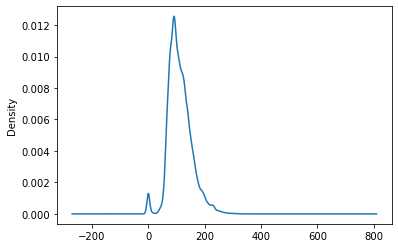

In [74]:
df['avg_price_per_room'].plot(kind='kde')

In [75]:
pd.set_option('display.max_rows',500)

In [76]:
df.groupby('booking_status').describe().transpose()

booking_status                                  Canceled  Not_Canceled
no_of_adults                         count  14480.000000  28061.000000
                                     mean       2.006630      1.870817
                                     std        0.508737      0.530896
                                     min        0.000000      0.000000
                                     25%        2.000000      2.000000
                                     50%        2.000000      2.000000
                                     75%        2.000000      2.000000
                                     max        4.000000      4.000000
no_of_children                       count  14480.000000  28061.000000
                                     mean       0.195028      0.114821
                                     std        0.538281      0.411005
                                     min        0.000000      0.000000
                                     25%        0.000000      0.000000
                                     50%        0.000000      0.000000
                                     75%        0.000000      0.000000
                                     max        9.000000     10.000000
no_of_weekend_nights                 count  14480.000000  28061.000000
                                     mean       0.977486      0.852642
                                     std        0.941506      0.856273
                                     min        0.000000      0.000000
                                     25%        0.000000      0.000000
                                     50%        1.000000      1.000000
                                     75%        2.000000      2.000000
                                     max        8.000000      6.000000
no_of_week_nights                    count  14480.000000  28061.000000
                                     mean       2.604489      2.174940
                                     std        1.693275      1.398989
                                     min        0.000000      0.000000
                                     25%        1.000000      1.000000
                                     50%        2.000000      2.000000
                                     75%        3.000000      3.000000
                                     max       17.000000     17.000000
required_car_parking_space           count  14480.000000  28061.000000
                                     mean       0.012431      0.045615
                                     std        0.110803      0.208652
                                     min        0.000000      0.000000
                                     25%        0.000000      0.000000
                                     50%        0.000000      0.000000
                                     75%        0.000000      0.000000
                                     max        1.000000      1.000000
lead_time                            count  14480.000000  28061.000000
                                     mean     122.560221     54.016357
                                     std       88.740854     58.265992
                                     min        0.000000      0.000000
                                     25%       46.000000      9.000000
                                     50%      110.000000     35.000000
                                     75%      180.000000     82.000000
                                     max      521.000000    476.000000
repeated_guest                       count  14480.000000  28061.000000
                                     mean       0.000622      0.046399
                                     std        0.024924      0.210351
                                     min        0.000000      0.000000
                                     25%        0.000000      0.000000
                                     50%        0.000000      0.000000
                                     75%        0.000000      0.000000
                        

In [77]:
df[df['avg_price_per_room']==0]['market_segment_type'].value_counts()

Complementary    457
Online           184
Name: market_segment_type, dtype: int64

In [78]:
df.query('avg_price_per_room !=0')['market_segment_type'].value_counts()

Online           33965
Offline           5769
Corporate         1933
Aviation           195
Complementary       38
Name: market_segment_type, dtype: int64

<AxesSubplot:ylabel='Density'>

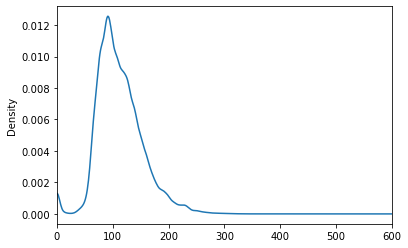

In [79]:
df['avg_price_per_room'].plot(kind='kde',xlim=(0,600))

In [80]:
df = df[df['avg_price_per_room']!=0]

In [81]:
df['avg_price_per_room'].min()

0.5

In [82]:
df['booking_status'].value_counts(normalize=True).to_frame().plot(kind='bar',backend='plotly')

In [83]:
df['booking_status']=df['booking_status'].replace({'Not_Canceled':0,'Canceled':1})

C:\Users\Hakim Aljanabi\AppData\Local\Temp\ipykernel_17244\1110309877.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [84]:
df['booking_status']

0        0
1        0
2        1
3        1
4        1
        ..
56920    0
56921    0
56922    1
56923    1
56924    0
Name: booking_status, Length: 41900, dtype: int64

In [89]:
df['booking_status'].value_counts(normalize=True).to_frameame()

,booking_status
0,0.654654
1,0.345346


<AxesSubplot:xlabel='arrival_complete_date', ylabel='booking_status'>

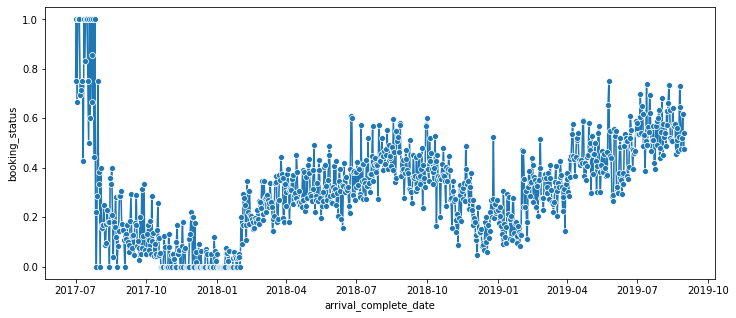

In [93]:
plt.figure(figsize=(12,5))
sns.lineplot(data=df,x='arrival_complete_date',y='booking_status',marker='o',ci=False)

<AxesSubplot:xlabel='year,week'>

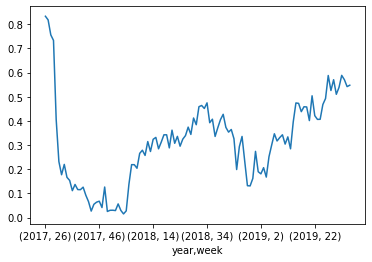

In [98]:
df.groupby(['year','week'])['booking_status'].mean().plot()

<AxesSubplot:xlabel='week', ylabel='booking_status'>

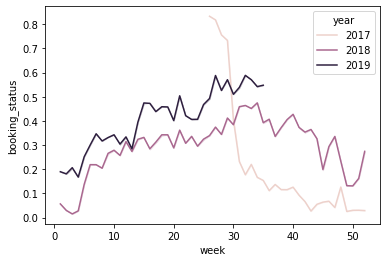

In [100]:
sns.lineplot(data=df,x='week',y='booking_status',hue='year',ci=False)

<AxesSubplot:xlabel='month', ylabel='booking_status'>

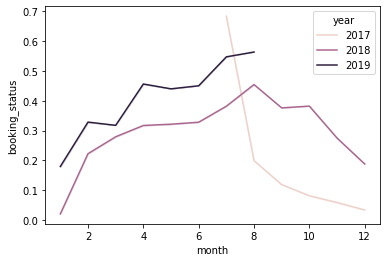

In [101]:
sns.lineplot(data=df,x='month',y='booking_status',hue='year',ci=False)

In [102]:
df.year.value_counts()

2018    21777
2019    16404
2017     3719
Name: year, dtype: int64

In [103]:
df.groupby(['year','week'])['booking_status'].mean()

year  week
2017  26      0.833333
      27      0.818182
      28      0.756098
      29      0.733333
      30      0.405405
      31      0.231884
      32      0.177419
      33      0.220238
      34      0.166667
      35      0.153846
      36      0.111554
      37      0.137168
      38      0.116000
      39      0.115646
      40      0.126050
      41      0.092683
      42      0.066176
      43      0.027027
      44      0.055172
      45      0.064000
      46      0.067961
      47      0.041667
      48      0.126582
      49      0.025478
      50      0.030303
      51      0.030612
      52      0.029197
2018  1       0.056701
      2       0.029851
      3       0.015306
      4       0.027933
      5       0.137755
      6       0.219178
      7       0.219020
      8       0.204268
      9       0.265909
      10      0.278912
      11      0.257353
      12      0.314672
      13      0.273608
      14      0.324138
      15      0.331959
      16      0.284783


In [117]:
drop_cols= ['day','week','month','year','required_car_parking_space','repeated_guest']

In [118]:
corr = df.drop(columns=drop_cols,axis=1).corr().round(3)

<AxesSubplot:>

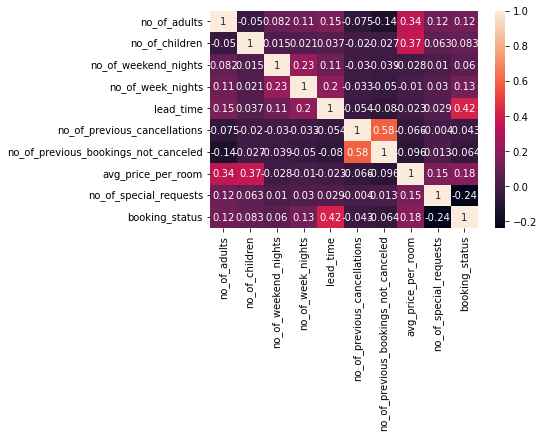

In [119]:
sns.heatmap(corr,annot=True)

<AxesSubplot:>

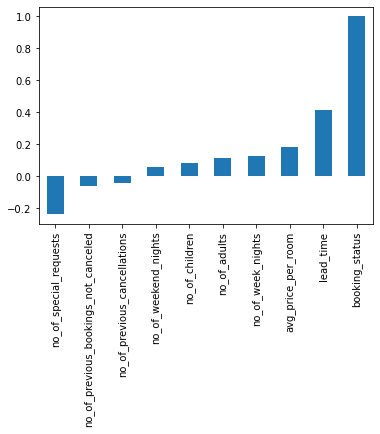

In [120]:
corr['booking_status'].sort_values().plot(kind='bar')

In [123]:
df2 = df.drop(columns=['arrival_complete_date','year','month','week','day'])

In [124]:
df2 = pd.get_dummies(df2,drop_first=True)

In [125]:
df2

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,...,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0,224,0,0,0,65.00,...,0,0,0,0,0,0,0,0,1,0
1,2,0,2,3,0,5,0,0,0,106.68,...,0,0,0,0,0,0,0,0,0,1
2,1,0,2,1,0,1,0,0,0,60.00,...,0,0,0,0,0,0,0,0,0,1
3,2,0,0,2,0,211,0,0,0,100.00,...,0,0,0,0,0,0,0,0,0,1
4,3,0,0,3,0,277,0,0,0,89.10,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56920,2,0,2,6,0,148,0,0,0,98.39,...,0,0,0,0,0,0,0,0,0,1
56921,2,1,0,1,0,45,0,0,0,163.88,...,0,0,1,0,0,0,0,0,0,1
56922,2,0,1,1,0,320,0,0,0,90.00,...,0,0,0,0,0,0,0,0,1,0
56923,2,0,0,3,0,63,0,0,0,94.50,...,0,0,0,0,0,0,0,0,0,1


<AxesSubplot:>

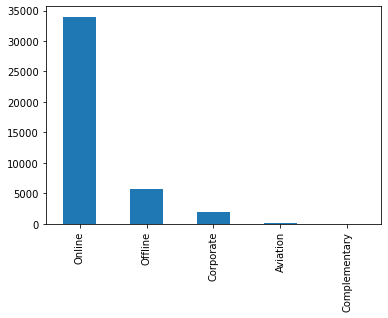

In [134]:
df['market_segment_type'].value_counts().plot(kind='bar')


In [135]:
from sklearn.model_selection import train_test_split

In [138]:
X = df2.drop(columns='booking_status')
y= df2['booking_status']

In [139]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.2, random_state= 2)

In [142]:
X_train.select_dtypes(['int','float'])

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
45925,2,0,2,3,0,87,0,0,0,155.00,1
51305,3,0,2,2,0,85,0,0,0,142.20,2
15898,2,0,2,5,0,54,0,0,0,114.63,0
35652,2,0,2,4,0,83,0,0,0,115.19,0
9838,2,2,1,0,0,11,0,0,0,191.35,1
...,...,...,...,...,...,...,...,...,...,...,...
40634,1,0,0,4,0,215,0,0,0,100.80,2
39554,2,0,1,3,0,14,0,0,0,80.24,0
7672,1,0,0,3,0,151,0,0,0,71.00,0
47101,2,0,1,0,0,24,0,0,0,70.00,0


In [147]:
to_be_scaled = ['no_of_adults','no_of_children','lead_time','avg_price_per_room']

In [148]:
from sklearn.preprocessing import StandardScaler

In [149]:
scaler = StandardScaler()

In [150]:
X_train_scaled = scaler.fit_transform(X_train[to_be_scaled])
X_test_scaled= scaler.fit(X_test[to_be_scaled])

In [151]:
X_train_scaled

array([[ 0.14525171, -0.30850547,  0.113703  ,  1.05750826],
       [ 2.04788444, -0.30850547,  0.08787568,  0.72674964],
       [ 0.14525171, -0.30850547, -0.31244777,  0.01432659],
       ...,
       [-1.75738103, -0.30850547,  0.94017724, -1.11309518],
       [ 0.14525171, -0.30850547, -0.69985757, -1.13893569],
       [ 2.04788444, -0.30850547, -0.19622483,  1.23839188]])

In [153]:
from sklearn.dummy import DummyClassifier

In [154]:
dum = DummyClassifier()

In [155]:
dum.fit(X_train,y_train)

DummyClassifier()

In [156]:
dum.score(X_train,y_train)

0.6554594272076373

In [157]:
from sklearn.linear_model import LogisticRegression

In [158]:
lr = LogisticRegression()

In [159]:
lr.fit(X_train,y_train)

C:\Users\Hakim Aljanabi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [160]:
lr.score(X_train,y_train)

0.7901849642004773

In [161]:
from sklearn.neighbors import KNeighborsClassifier

In [162]:
knn = KNeighborsClassifier()

In [163]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [164]:
knn.score(X_train,y_train)

0.8326372315035799

In [165]:
knn.score(X_test,y_test)

0.7473747016706443

In [166]:
from sklearn.svm import SVC

In [167]:
svc = SVC()

In [168]:
svc.fit(X_train,y_train)

SVC()

In [169]:
svc.score(X_train,y_train)

0.7580847255369928

In [170]:
svc.score(X_test,y_test)

0.7565632458233891